# Project 1 - Customer Service Requests Analysis

    Ask:1. Perform data analysis of service request (311) calls from New York City

        2. Utilize data wrangling techniques to understand the pattern in the data
        
        3. Visualize the major types of complaints

## 1. Understanding Dataset

In [1]:
#Import all the packages at once rather than importing as and when required going thorugh in Project requirment.

import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: File Downloaded from LMS and saved in local drive

Step 2: File - 311_Service_Requests_from_2010_to_Present.csv extracted and uploaded

In [2]:
service_request_df = pd.read_csv(r"C:\Users\Abhishek\OneDrive\Documents\Data Scientist\Class Notes\Python\Datasets - LMS\Project_Two_Dataset\311_Service_Requests_from_2010_to_Present.csv",low_memory=False)

1.1 Identify the shape of the dataset

In [3]:
# Identifying dataset shape

service_request_df.shape

(364558, 53)

1.2 Identify variables with null values

In [4]:
# Identifying null values

service_request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

## 2. Perform basic data exploratory analysis

2.1 Utilize missing value treatment

In [5]:
# Putting Sum to all null values in dataset

service_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [6]:
# Updating one of the columns "Descriptor" to "no info"

service_request_df['Descriptor'].fillna(value=service_request_df['Descriptor'].mode(),inplace=True)

In [7]:
service_request_df['Descriptor'].isnull().sum()

6501

In [8]:
service_request_df['Descriptor'].fillna(value='no info',inplace=True)

In [9]:
service_request_df['Descriptor'].isnull().sum()

0

In [10]:
# Validating if the blank cells or null values has been updated. the result states "yes"

service_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [11]:
# There are 5 columns which are completely blank and are being drop out of DF using "dropna"

service_request_df.dropna(axis=1,how='all',inplace= True)

In [12]:
service_request_df.shape

(364558, 48)

In [13]:
# Chekcing if the columns with all blank details have been removed or not. After 5 removed total columsn are 48

service_request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      364558 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [14]:
# Identifying the remaining columns with null values.

service_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

Here all the columns are not filled at once as well as column does have different data types. Hence a generic value of "0" has not been used to fill any null value.

In [15]:
service_request_df['Closed Date'].fillna(value='no info',inplace=True)

In [16]:
service_request_df['Location Type'].fillna(value='no info',inplace=True)

In [17]:
service_request_df['Incident Address'].fillna(value='no info',inplace=True)

In [18]:
service_request_df['Street Name'].fillna(value='no info',inplace=True)

In [19]:
service_request_df['Cross Street 1'].fillna(value='no info',inplace=True)

In [20]:
service_request_df['Cross Street 2'].fillna(value='no info',inplace=True)

In [21]:
service_request_df['Intersection Street 1'].fillna(value='no info',inplace=True)

In [22]:
service_request_df['Intersection Street 2'].fillna(value='no info',inplace=True)

In [23]:
service_request_df['Address Type'].fillna(value='no info',inplace=True)

In [24]:
service_request_df['City'].fillna(value='no info',inplace=True)

In [25]:
service_request_df['Landmark'].fillna(value='no info',inplace=True)

In [26]:
service_request_df['Facility Type'].fillna(value='no info',inplace=True)

In [27]:
service_request_df['Due Date'].fillna(value='no info',inplace=True)

In [28]:
service_request_df['Resolution Action Updated Date'].fillna(value='no info',inplace=True)

In [29]:
service_request_df['School Region'].fillna(value='no info',inplace=True)

In [30]:
service_request_df['School Code'].fillna(value='no info',inplace=True)

In [31]:
service_request_df['School Zip'].fillna(value='no info',inplace=True)

In [32]:
service_request_df['Bridge Highway Name'].fillna(value='no info',inplace=True)

In [33]:
service_request_df['Bridge Highway Direction'].fillna(value='no info',inplace=True)

In [34]:
service_request_df['Road Ramp'].fillna(value='no info',inplace=True)

In [35]:
service_request_df['Bridge Highway Segment'].fillna(value='no info',inplace=True)

In [36]:
service_request_df['Ferry Direction'].fillna(value='no info',inplace=True)

In [37]:
service_request_df['Ferry Terminal Name'].fillna(value='no info',inplace=True)

In [38]:
service_request_df['Incident Zip'].fillna(value='no info',inplace=True)

In [39]:
service_request_df['X Coordinate (State Plane)'].fillna(value='no info',inplace=True)

In [40]:
service_request_df['Y Coordinate (State Plane)'].fillna(value='no info',inplace=True)

In [41]:
service_request_df['Latitude'].fillna(value='no info',inplace=True)

In [42]:
service_request_df['Longitude'].fillna(value='no info',inplace=True)

In [43]:
service_request_df['Location'].fillna(value='no info',inplace=True)

In [44]:
# Confirming if all the values have been successfully updated with "no info"

service_request_df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Intersection Street 1             0
Intersection Street 2             0
Address Type                      0
City                              0
Landmark                          0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name          

In [45]:
# Just in case if i wulod have tried to do this in one coding

sr_df = service_request_df.fillna(value='no info')
sr_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,no info,no info,no info,no info,no info,no info,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,no info,no info,no info,no info,no info,no info,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,no info,no info,no info,no info,no info,no info,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,no info,no info,no info,no info,no info,no info,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,no info,no info,no info,no info,no info,no info,40.73306,-73.87417,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,N,no info,no info,no info,no info,no info,no info,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,N,no info,no info,no info,no info,no info,no info,40.86783,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,N,no info,no info,no info,no info,no info,no info,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,N,no info,no info,no info,no info,no info,no info,40.886361,-73.85329,"(40.88636077906953, -73.85329048666742)"


2.2 Analyze the date column and remove the entries if it has an incorrect timeline

In [46]:
# Creating a header to view column with time

service_request_df[['Created Date','Closed Date','Due Date','Resolution Action Updated Date']]

,Created Date,Closed Date,Due Date,Resolution Action Updated Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM,01/01/2016 12:55:15 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM,01/01/2016 01:26:57 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM,01/01/2016 04:51:03 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM,01/01/2016 07:43:13 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM,01/01/2016 03:24:42 AM
...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM,01/01/2015 10:22:31 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM,01/01/2015 02:25:02 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM,01/01/2015 12:20:33 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM,01/01/2015 02:42:22 AM


 Conclusion: = Date format looks good

2.3 Draw a frequency plot for city-wise complaints

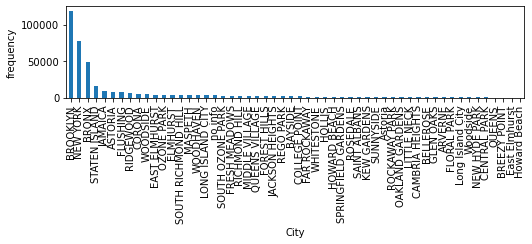

In [47]:
# Frequnecy plot for city count

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

city_df = service_request_df['City'].value_counts().plot(ax=ax, kind='bar', xlabel='City', ylabel='frequency')

plt.show()

In [48]:
# Presenting the frequency plot for city-wise

service_request_df['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
no info                  2997
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE  

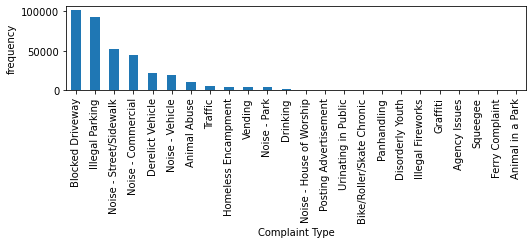

In [49]:
# Frequnecy plot for Complaint wise

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

city_df = service_request_df['Complaint Type'].value_counts().plot(ax=ax, kind='bar', xlabel='Complaint Type', ylabel='frequency')

plt.show()

In [50]:
# Presenting the frequency plot for Complaint Wise in Count

service_request_df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

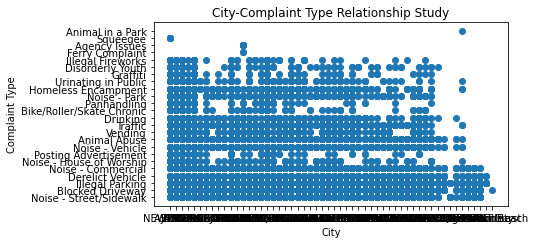

In [51]:
# Frequency of City wise - Complaint type in Scatter in matplotlib

plt.scatter(service_request_df['City'],service_request_df['Complaint Type'])
plt.xlabel('City')
plt.ylabel('Complaint Type')
plt.title('City-Complaint Type Relationship Study')
plt.show()

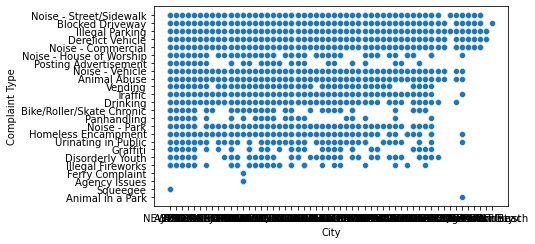

In [52]:
# Frequency of City wise - Complaint type in Scatter in seaborn

plot = sns.scatterplot(x='City',y='Complaint Type',data=service_request_df)

2.4 Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [53]:
for i in service_request_df['City'].values:
    if i contains ('BROOKLYN'):
        city_df.append(i.index)
        
new_service_request_df = service_request_df[city_df].index

SyntaxError: invalid syntax (2529687283.py, line 2)

2.4.1 Draw scatter plots for complaint concentration across Brooklyn

In [54]:
def new_df (City):
    for i in service_request_df['City'].values:
        if i == ('BROOKLYN'):
            index = i

In [55]:
new_df.value()

AttributeError: 'function' object has no attribute 'value'

In [56]:
City_df.iloc[index]

NameError: name 'City_df' is not defined

In [57]:
final_df = service_request_df[new_df].index

KeyError: None

2.4.2 Draw hexbin plots for complaint concentration across Brooklyn

In [58]:
plt.hexbin(x,y,gridsize=15, mincnt=1, edgecolors="none", cmap="inferno")
plt.scatter(x,y, s=2, c="white")
plt.show()

NameError: name 'x' is not defined

In [59]:
x = Longitude(size=(1, 10000))
y = Latitude(size=(1, 10000))
plt.hexbin(x, y, gridsize=35, cmap="plasma")

NameError: name 'Longitude' is not defined

ValueError: First argument must be a sequence

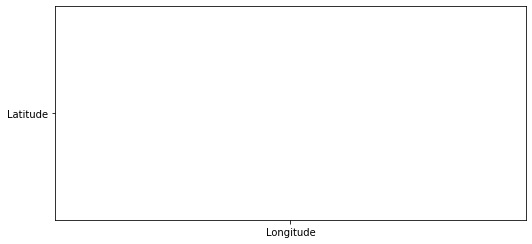

In [60]:
plt.hexbin(x='Longitude',y='Latitude',gridsize = 50,cmap ='greens')
plt.title('Concentration across BROOKLYN')
plt.show()

ValueError: could not convert string to float: 'no info'

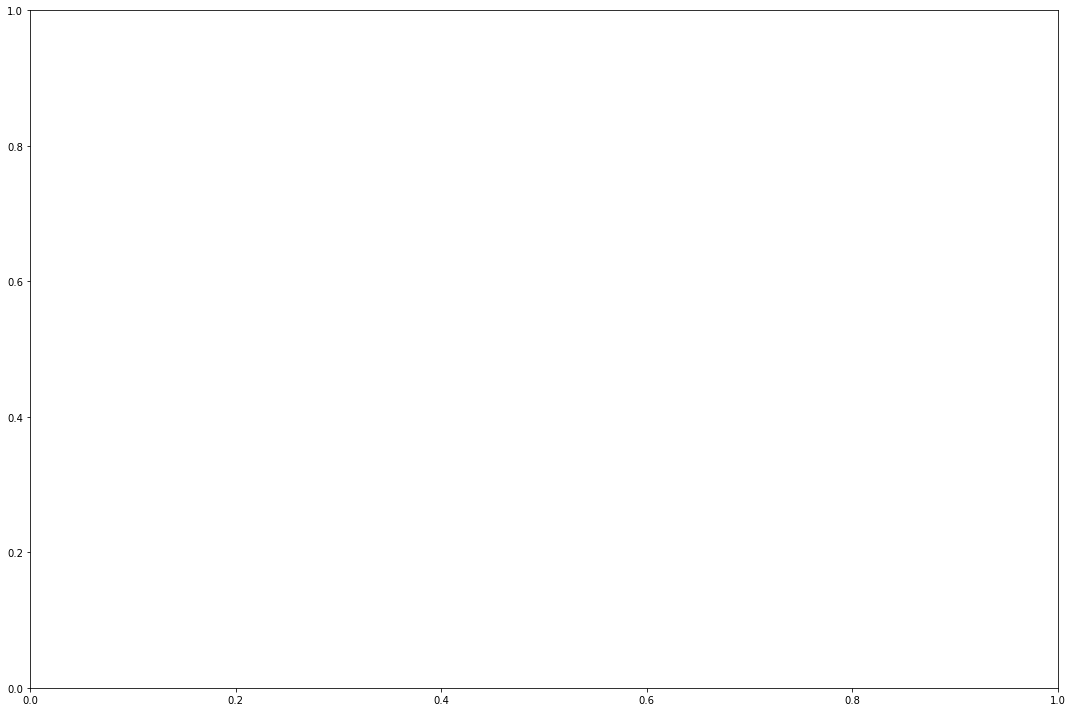

In [61]:
service_request_df[['Longitude','Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(15,10),title = 'Complaints_concentration across Brooklyn').axis('equal')

### i have tried multiple things for the the particular section in coding but no help.. even went ahead with hat was advised in class but still errors.

## 3. Find major types of complaints

3.1 Plot a bar graph of count vs. complaint types

In [73]:
service_request_df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Illegal Parking'),
 Text(3, 0, 'Derelict Vehicle'),
 Text(4, 0, 'Noise - Commercial'),
 Text(5, 0, 'Noise - House of Worship'),
 Text(6, 0, 'Posting Advertisement'),
 Text(7, 0, 'Noise - Vehicle'),
 Text(8, 0, 'Animal Abuse'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Traffic'),
 Text(11, 0, 'Drinking'),
 Text(12, 0, 'Bike/Roller/Skate Chronic'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Noise - Park'),
 Text(15, 0, 'Homeless Encampment'),
 Text(16, 0, 'Urinating in Public'),
 Text(17, 0, 'Graffiti'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks'),
 Text(20, 0, 'Ferry Complaint'),
 Text(21, 0, 'Agency Issues'),
 Text(22, 0, 'Squeegee'),
 Text(23, 0, 'Animal in a Park')]

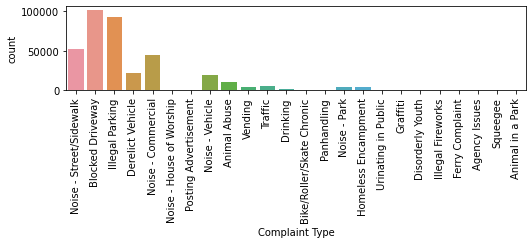

In [74]:
plot = sns.countplot(x='Complaint Type', data=service_request_df)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

3.2 Find the top 10 types of complaints

In [80]:
Top10_new = service_request_df['Complaint Type'].value_counts().head(10)
Top10_new

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

3.3 Display the types of complaints in each city in a separate dataset

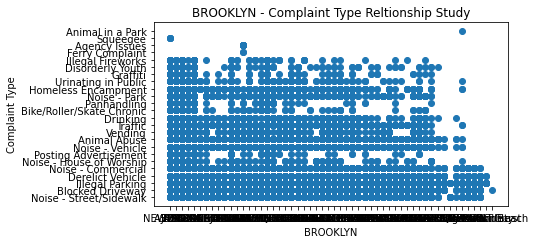

In [86]:
plt.scatter(city_complaints['City'],city_complaints['Complaint Type'])
plt.xlabel('BROOKLYN')
plt.ylabel('Complaint Type')
plt.title('BROOKLYN - Complaint Type Reltionship Study')
plt.show()

Bar chart - No. of complaint in Y axis. Group BY complaint types

## 4. Visualize the major types of complaints in each city

In [82]:
city_complaints = service_request_df[['City','Complaint Type']]

In [83]:
city_complaints.head

<bound method NDFrame.head of                     City           Complaint Type
0               NEW YORK  Noise - Street/Sidewalk
1                ASTORIA         Blocked Driveway
2                  BRONX         Blocked Driveway
3                  BRONX          Illegal Parking
4               ELMHURST          Illegal Parking
...                  ...                      ...
364553         WOODHAVEN          Illegal Parking
364554             BRONX          Noise - Vehicle
364555          NEW YORK  Noise - Street/Sidewalk
364556             BRONX         Blocked Driveway
364557  SOUTH OZONE PARK         Blocked Driveway

[364558 rows x 2 columns]>

[Text(0, 0, 'NEW YORK'),
 Text(1, 0, 'ASTORIA'),
 Text(2, 0, 'BRONX'),
 Text(3, 0, 'ELMHURST'),
 Text(4, 0, 'BROOKLYN'),
 Text(5, 0, 'KEW GARDENS'),
 Text(6, 0, 'JACKSON HEIGHTS'),
 Text(7, 0, 'MIDDLE VILLAGE'),
 Text(8, 0, 'REGO PARK'),
 Text(9, 0, 'SAINT ALBANS'),
 Text(10, 0, 'JAMAICA'),
 Text(11, 0, 'SOUTH RICHMOND HILL'),
 Text(12, 0, 'no info'),
 Text(13, 0, 'RIDGEWOOD'),
 Text(14, 0, 'HOWARD BEACH'),
 Text(15, 0, 'FOREST HILLS'),
 Text(16, 0, 'STATEN ISLAND'),
 Text(17, 0, 'OZONE PARK'),
 Text(18, 0, 'RICHMOND HILL'),
 Text(19, 0, 'WOODHAVEN'),
 Text(20, 0, 'FLUSHING'),
 Text(21, 0, 'CORONA'),
 Text(22, 0, 'QUEENS VILLAGE'),
 Text(23, 0, 'OAKLAND GARDENS'),
 Text(24, 0, 'HOLLIS'),
 Text(25, 0, 'MASPETH'),
 Text(26, 0, 'EAST ELMHURST'),
 Text(27, 0, 'SOUTH OZONE PARK'),
 Text(28, 0, 'WOODSIDE'),
 Text(29, 0, 'FRESH MEADOWS'),
 Text(30, 0, 'LONG ISLAND CITY'),
 Text(31, 0, 'ROCKAWAY PARK'),
 Text(32, 0, 'SPRINGFIELD GARDENS'),
 Text(33, 0, 'COLLEGE POINT'),
 Text(34, 0, 'BAYSIDE')

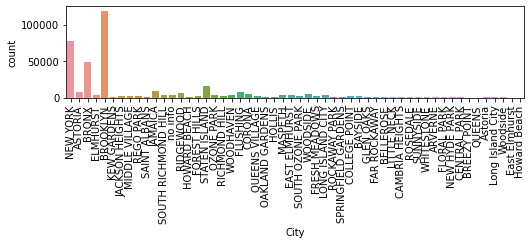

In [84]:
plot = sns.countplot(x='City', data=city_complaints)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

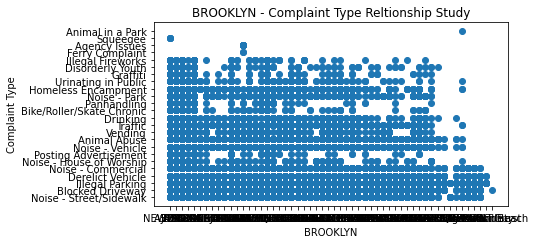

In [85]:
plt.scatter(city_complaints['City'],city_complaints['Complaint Type'])
plt.xlabel('BROOKLYN')
plt.ylabel('Complaint Type')
plt.title('BROOKLYN - Complaint Type Reltionship Study')
plt.show()

## 5. Check if the average response time across various types of complaints

In [87]:
import datetime

In [88]:
service_request_df['Created Date'] = pd.to_datetime(service_request_df['Created Date'])
service_request_df['Resolution Action Updated Date'] = pd.to_datetime(service_request_df['Resolution Action Updated Date'])
service_request_df['Request_Closing_Time'] = service_request_df['Created Date']-service_request_df['Resolution Action Updated Date']

ParserError: Unknown string format: no info

## 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

MUltiple attempts but not able to clear through need some guidance